# Probability Theory Tutorial

Uncertainty is a key concept that plays a central role in many aspects of life. It arises from a number of sources including ambiguity, overlapping class membership, individual variation, and measurement noise, among others. 



## Basic Definitions

Though there now exist several alternative derivations of the laws of probability (including *Cox's Theorem*, and the *Dutch Book* argument), the axiomatic account developed by Kolmogorov (in 1933!) is generally viewed as forming the foundation of modern probability theory. The nice thing about this formulation is that it applies to any reasonable interpretation of probability. It defines probability simply as a measure on a sample space of events.

**Sample Space ($\Omega$):** The set of all possible events or outcomes (e.g., outcome of coin flip, randomly chosen scene or image, performance on a psychological or behavioral test)

**Random Variable ($X$):** A mapping from outcomes to real values (e.g., 1 for heads, a vector of scene parameters or image luminances, normalized test score)



Kolmogorov's axioms state that a function _P_ is a probability measure if:
- - -
1. $P(\Omega)= 1$
>_The measure of the function on the entire sample space is 1_
2. $P(A)\geq 0, \ A\in \Omega$ 
>_The measure of any subset of the sample space is greater than or equal to zero_
3. $P(\bigcup_i{A_i}) = \sum_{i}{P(A_i)}$
>_The measure of any countable set of disjoint (i.e., mutually exclusive) events is equal to the sum of the measures of those individual events_

- - -
A number familiar properties of probability measures follow directly from these axioms. These include

1. $0 \leq P(A) \leq 1$
>_The probability of any subset of the sample space is between zero and one, inclusive_
2. $P(\text{not } A) = 1-P(A)$
>_The probability of the complement of any set is one minus the probability of that set_
3. $P(B)\leq P(A), \ B \subset A$
>_The probability of any subset of a set is smaller than the probability of the original set_
4. $P(A\cup B) = P(A)+P(B)-P(A \cap B)$
>_The probability of the union of any two sets is the sum of their individual probabilities minus the probability of their intersection_




# Stochastic Processes and Probability Distributions

In the  basic probability theory we have introduced the notion of a *sample space* $\Omega$, the definition of a *random variable* $X$ as a mapping $\omega \rightarrow X(\omega)\in\mathbb{R}$ from events in the sample space to (usually) real numbers and the concept of probability distribution. The probability distribution is a mathematical function that provides the probabilities of occurrence of different possible outcomes in an experiment. In more technical terms, the probability distribution is a description of a random phenomenon (called stochastic process)  in terms of the probabilities of events. For instance, if the random variable X is used to denote the outcome of a coin toss ("the experiment"), then the probability distribution of X would take the value 0.5 for X = heads, and 0.5 for X = tails (assuming the coin is fair). Examples of random phenomena can include the results of an experiment or survey. 



\begin{example}
## Coin toss model

We model Heads as success with value 1 and probability $p$. Conversely, we model Tails as failure with value 0 with probability $1-p$. Suppose we toss 3 coins - these are the possible outcomes:

    000
    001
    010
    011
    100
    101
    110
    111
It is easy to see that there are $2^k$ possible outcomes when we toss $k$ coins (or equivalently toss one coin $k$ times). In statistics, each “toss” is known as a **trial**.

A random variable is a function that maps each outcome to a number. For example, the number of successes in 3 trials is a random variable, with the following mapping:

    000 -> 0
    001 -> 1
    010 -> 1
    011 -> 2
    100 -> 1
    101 -> 2
    110 -> 2
    111 -> 3
Count models are concerned with the behavior of the random variable that can be interpreted as the number of successes in $k$ trials. In this notebook, we will explore three common count models - the _binomial_, _Poisson_ and _negative binomial_ distributions.

\end{example}



Next we introduce the notion of a **stochastic process** and discussing how such processes idealize real-world phenomena and how they can be used to map real-world events to common distributions.

## Stochastic Processes
A stochastic process is simply a collection of indexed random variables $X_t, t\in T$. The set of possible values for the indices $t$ is sometimes called the **index space**, while the set of possible values for the variables $X$ is typically called the **state space**. The index space can be just about anything we will assume that the indices represent time, in which case a stochastic process is an temporally ordered sequence of random variables.

Note that both the indices $t$ and the random variables $X$ may be either discrete or continuous. This leads to four classes of stochastic processes:

1. discrete-time, discrete-state
2. continuous-time, discrete-state
3. discrete-time, continuous-state
4. continuous-time, continuous-state

We will focus on the most basic stochastic processes belonging to categories (1) and (2), respectively. These are the **Bernoulli Process**,  the **Poisson Process**, and the **Binomial distribution" as its variances**. Most of the parametric distributions that you encounter can be derived from one (or both) of these two processes. In addition, we will study a number of continuous processes including the most important one the **normal distribution". 

# Discrete Probability Distributions
Discrete random variables (i.e., variables with distributions defined only on integers) and their associated probability distributions are probably the easiest to grasp intuitively. 
A discrete distribution can be characterized either by its **probability mass function** $P(X=x)$ which simply indicates the probability associated with each possible value of the random variable, or by its **cumulative distribution function**  $P(X\leq x_n) = \sum^{n}_{i}{P(X=x_i)}$ which indicates the probability that the random variable takes on a value less than (or equal to) the indicated value. 


R has functions to handle many probability distributions. The table below gives the names of the functions for each distribution and a link to the on-line documentation that is the authoritative reference for how the functions are used. But don't read the on-line documentation yet. First, try the examples in the sections following the table in http://www.stat.umn.edu/geyer/old/5101/rlook.html

Every distribution that R handles has four functions. There is a root name,
for example, the root name for the normal distribution is norm. This root is
prefixed by one of the letters 

    • p for “probability”, the distribution function (DF)
    • q for “quantile”, the inverse DF for a continuous random variable or
    • d for “density”, the probability mass function (PMF) for a discrete
    random variable or the probability density function (PDF) for a
    continuous random variable
    • r for “random”, a random variable having the specified distribution 
    
For the normal distribution, these functions are pnorm, qnorm, dnorm, and 
rnorm. For the binomial distribution, these functions are pbinom, qbinom, 
dbinom, and rbinom. And so forth.

For a continuous distribution (like the normal), the most useful functions for doing problems involving probability calculations are the "p" and "q" functions (c.d.f. and inverse c.d.f.), because the density (p. d. f.) calculated by the "d" function can only be used to calculate probabilities via integrals and R doesn't do integrals. 

For a discrete distribution (like the binomial), the "d" function calculates the density (p.f.), which in this case is a probability 

$f(x) = P(X = x)$ 
and hence is useful in calculating probabilities. 

**Distribution Functions in R**

|name |cdf/pmf|quantile/inverse of cdf|density function|random sampling|
|-----|:-------:|:-----------------------:|----------------:|---------------|
|Beta | pbeta | qbeta | dbeta | rbeta  |
|Binomial|  pbinom|  qbinom|  dbinom|  rbinom | 
|Cauchy|  pcauchy|  qcauchy|  dcauchy|  rcauchy|  
|Chi-Square|  pchisq|  qchisq|  dchisq|  rchisq|  
|Exponential|  pexp|  qexp| dexp | rexp | 
|F  |pf  |qf  |df|  rf | 
|Gamma|  pgamma|  qgamma|  dgamma|  rgamma | 
|Geometric|  pgeom|  qgeom|  dgeom|  rgeom|  
|Hypergeometric|  phyper|  qhyper|  dhyper | rhyper| 
|Logistic|  plogis|  qlogis|  dlogis | rlogis | 
|Log Normal|  plnorm|  qlnorm|  dlnorm | rlnorm | 
|Negative Binomial|  pnbinom|  qnbinom|  dnbinom | rnbinom|  
|Normal|  pnorm | qnorm|  dnorm | rnorm  |
|Poisson|  ppois|  qpois|  dpois|  rpois|  
|Student| t|  pt| qt|  dt|  rt|  
|Studentized Range|  ptukey|  qtukey|  dtukey|  rtukey|  
|Uniform|  punif|  qunif|  dunif | runif | 
|Weibull | pweibull | qweibull|  dweibull|  rweibull|  
|Wilcoxon Rank Sum Statistic|  pwilcox|  qwilcox|  dwilcox|  rwilcox|  
|Wilcoxon Signed Rank Statistic|  psignrank | qsignrank|  dsignrank|  rsignrank |

The relation of these distributions and their parameters are depicted in the following graph.

![rel_dist](overview.png)


**Okay, so now you have a slew of tools to describe stochastic processes-models-experiments, what type of questions we are interested to answer?**


![table](table_pr_dist.png)

In [2]:
library(tidyverse)       

## Uniform (discrete)

Perhaps the most familiar form of distribution (for nonscientists) is the discrete uniform distribution,where $n$ mutually exclusive outcomes are equally likely. This arises in many games of chance (such as the flip of a fair coin, the roll of a fair die or the a turn of the roulette wheel). It has only one parameter, which is the number of possible outcomes:

$$P(x) = 1/n,\ \  x \in \{1,...,n\}$$

alternatively, it can be defined over a particular range by specifying the lower and upper bounds of that range

$$P(x) = 1/(k-j),\ \  x \in \{j,j+1,...,k-1\}$$

check the https://en.wikipedia.org/wiki/Discrete_uniform_distribution for details.


In [13]:
# example of using the continouous uniform distribution function to implement the discrete uniform distribution

a <- round(runif(10, min=0, max=100))
a
mean(a)
var(a)

[1] 88 25 14 90  4 17 15 67 74 26

[1] 42

[1] 1132.889

### Mean and Variance of a discrete uniform distribution

In [28]:
library(purrr)
a = 0
b = 100
x = rdunif(10, 0,100 )
x
mean(x)
var(x)
m = (a+b)/2
v= ((b-a+1)^2-1)/12
m
v

[1] 71 34 34 94  8 18  7 50 82 84

[1] 48.2

[1] 1074.844

[1] 50

[1] 850

## Uniform (continuous)

|Notation           |Formulas             |
|------------------:|:-------------------:|
|PDF	|$F(x)=\left\{\begin{array}{ll}{\frac{1}{b-a}} & {\text { for } x \in[a, b]} \\ {0} & {\text { otherwise }}\end{array}\right.$|
|inverse F|$F^{-1}(p)=a+p(b-a)$ for $0<p<1$|
|CDF	|$\left\{\begin{array}{ll}{0} & {\text { for } x<a} \\ {\frac{x-a}{b-a}} & {\text { for } x \in[a, b)} \\ {1} & {\text { for } x \geq b}\end{array}\right.$|
|Mean	|$\frac{1}{2}(a+b)$|
|Median	|$\frac{1}{2}(a+b)$|
|Mode	|any value in (a,b)|
|Variance|	$\frac{1}{12}(b-a)^{2}$|
|Skewness|	0|
|Ex. kurtosis|	$\tfrac {6}{5}$|
|Entropy|	$ln(b−a)$|
|MGF|	$\left\{\begin{array}{ll}{\frac{\mathrm{e}^{t b}-\mathrm{e}^{t a}}{t(b-a)}} & {\text { for } t \neq 0} \\ {1} & {\text { for } t=0}\end{array}\right.$|
|CF	|$\left\{\begin{array}{ll}{\frac{\mathrm{e}^{t b}-\mathrm{e}^{t a}}{t(b-a)}} & {\text { for } t \neq 0} \\ {1} & {\text { for } t=0}\end{array}\right.$|

In `stats`, the discrete uniform distribution is called `rubif` and is defined using the second form.
If `min` or `max` are not specified they assume the default values of `0` and `1` respectively.

The uniform distribution has density $$f(x)=\frac{1}{\max -\min }$$

for $\min \leq x \leq \max$.

For the case of $u:=min==max$, the limit case of $X≡u$ is assumed, although there is no density in that case and `dunif` will return `NaN` (the error condition).

`runif` will not generate either of the extreme values unless `max = min` or `max-min` is small compared to min, and in particular not for the default arguments.

**Value**
`dunif` gives the density, `punif` gives the distribution function, `qunif` gives the quantile function, and `runif` generates random deviates.

In [11]:
# NOT RUN {
u <- runif(20)

## The following relations always hold :
punif(u) == u
dunif(u) == 1
mean(runif(10000))
var(runif(10000))  

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[16] TRUE TRUE TRUE TRUE TRUE

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[16] TRUE TRUE TRUE TRUE TRUE

[1] 0.4978324

[1] 0.08348537

## The Bernoulli Process

The Bernoulli process, perhaps the simplest of all stochastic processes, represents a sequence of independent Bernoulli trials. Intuitively, you can think of it as representing a sequence of (biased) coin flips, with each random variable taking on one of two possible values.

This process can be used to model any real-world process that has a binary outcome (e.g., correct/incorrect, left/right, male/female, etc.) and can be broken down into individual independent trials. Examples include:

- the sexes of a sequence of babies born in a particular hospital
- the responses of an observer in a forced-choice psychophysical experiment
- the outcomes of tennis matches for a particular player

You can simulate a Bernoulli process by creating an ordered set of trials whose values are randomly and independently set to take the value 1 with probability $p$ and 0 with probability $1-p$. In Python, the most basic way to do this is using the `rand` function, which draws a random floating point value uniformly from the interval [0,1]. The rand function in R is supported by the pracma library https://www.rdocumentation.org/packages/pracma/versions/1.9.9


In [3]:
# Specify the number of trials and the success probability p.
%pylab inline
from scipy import stats
nr_trials = 10000;
p = 0.7;
# create random values and map values < p to 1 and values > p to zero
bern_proc = (rand(nr_trials)<p)*1;
# print the first 20 values
bern_proc[1:20]

Populating the interactive namespace from numpy and matplotlib


array([1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1])

The array `bern_proc` above now represents an approximation of a Bernoulli process. Many discrete distributions can be derived directly from the properties of this sequence, including:

- The binomial distribution (count _k_ of successes in _n_ trials)
- The geometric distribution (the number of trials _n_ needed to get one success)
- The negative binomial distribution (the number of successes observed before getting _k_ failures)

There are no specific functions for Bernoulli distribution since it is a special case of the binomial distribution to be presented next.

[1] 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 0 1

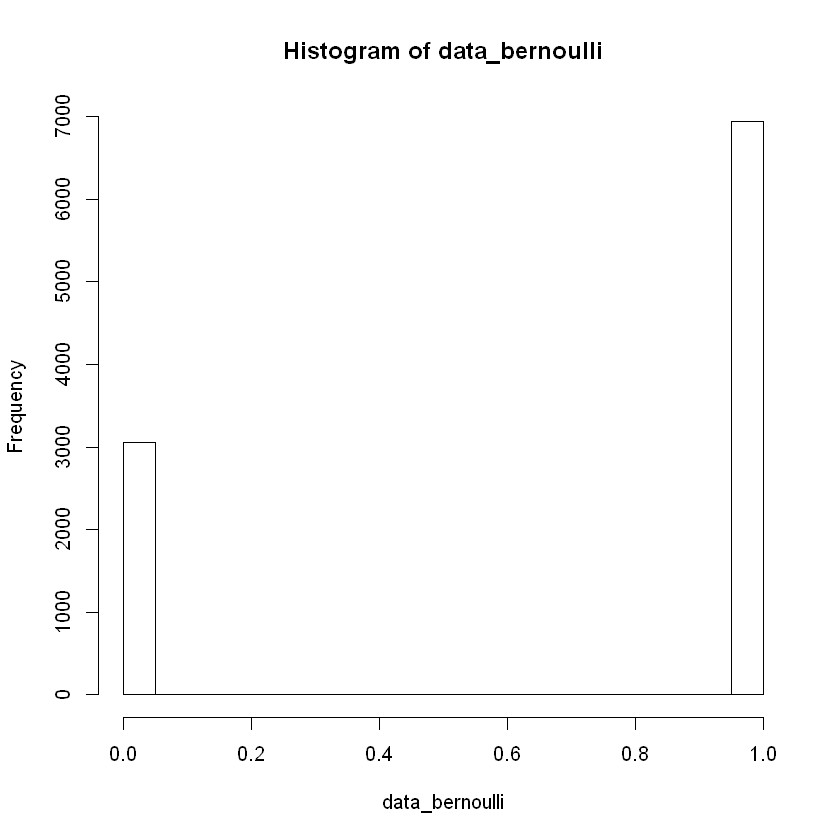

In [29]:
data_bernoulli = as.numeric(rbinom(10000, 1,0.7))
data_bernoulli[1:20]
hist(data_bernoulli)

# Binomial model

The **Binomial** distribution refers to a whole class of discrete distributions. The **Binomial** distribution occurs in cases where

\begin{enumerate}
\item We have a fixed number of trials (i.e., attempts) are done (run n trials).
\item There are only 2 possible outcomes of each trial: one is called a success, the other called a failure. It is called Bernoulli trials.
\item The probability of success is the same for each trial. We designate the probability of success on any one trial as p. This means that the probability of a failure is (1-p).
\item The trials are independent; knowing the outcome of one trial tells you nothing about the outcome of the next trial.
\item **We are looking at a random variable, X, that is the number of successes in those n trials.** 
\end{enumerate}



\begin{example}
If we start with a coin that has a 56% probability of coming up heads when we spin the coin. We will spin it 5 times (there are 5 trials). On each spin the probability of getting heads is 0.56. The spins are independent events; the coin does not change its behavior based on its history of spins. We want to know the probability that we will get each of the following: 5 heads, 4 heads and 1 tail, 3 heads and 2 tails, 2 heads and 3 tails, 1 head and 4 tails, and 5 tails. This situation where we have n=5 and p=0.56, is one instance of a binomial distribution. If we change the value of n and/or we change the value of p we get a different instance of a binomial distribution. 
\end{example}


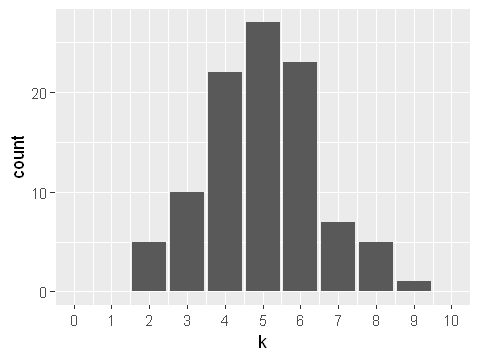

In [3]:
## Fair coin simulation

outcomes <- replicate(100, sum(sample(0:1, 10, replace=TRUE)))

options(repr.plot.width=4, repr.plot.height=3)

ggplot(data.frame(k=outcomes), aes(x=k)) +
geom_bar() +
scale_x_continuous(limits=c(0, 10), breaks=0:10)

# Biased coin

Warning message:
"Removed 1 rows containing missing values (geom_bar)."

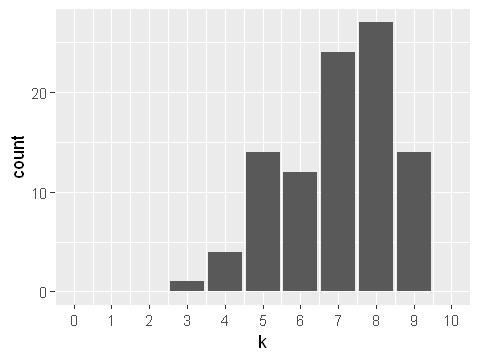

In [4]:
p <- 0.7
outcomes <- replicate(100, sum(sample(0:1, 10, replace=TRUE, prob = c(1-p, p))))
ggplot(data.frame(k=outcomes), aes(x=k)) +
geom_bar() +
scale_x_continuous(limits=c(0, 10), breaks=0:10)

# The binomial distribution
The two simulations above are examples of draws from the binomial distribution. Here we repeat the simulations using the more compact binomial distribution model described by an R function. 

**Specifically, the `pbinom(k,n,p)` function in R computes $P(X \le k)$ for $n$ trials with $p$ the probability of a success. Notice that this computes the probability of getting $k$ or fewer successes in $n$ trials, not the probability of getting exactly k successes.** 

\begin{example}
Assuming the r.v  X with binomial distribution where $n=5$ and $p=0.40$ then compute $P(X=3)$. Notice that in this case we must implement the equation $P(X=3)=P(X \leq 3)-P(X \leq 2)$ in R using the `pdinom` function.
\end{example}


In [1]:
pbinom(3,5,0.4)-pbinom(2,5,0.4)

[1] 0.2304

This business of having to do the subtraction to find the probability of getting an exact number of successes can be a bit tiring. Perhaps we should look at some way to just get the answer. We can do this by letting R do all of the work via a new function that we will build. The code for that function is: 

In [2]:
pbinomeq <- function( k, n, p )
  {
    x<- pbinom(k,n,p)
    if( k>0)
    { y <- pbinom(k-1, n, p)
      x <- x - y
    }
return( x )

}

In [3]:
pbinomeq(3,5,0.4)

[1] 0.2304

# Fair coin simulation using binomial distribution

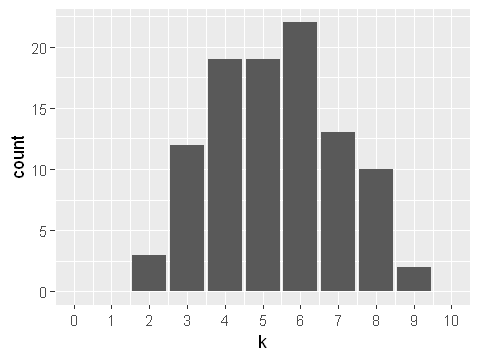

In [5]:
outcomes <- rbinom(n=100, size=10, prob=0.5)

ggplot(data.frame(k=outcomes), aes(x=k)) +
geom_bar() +
scale_x_continuous(limits=c(0, 10), breaks=0:10)

# Biased coin

Warning message:
"Removed 1 rows containing missing values (geom_bar)."

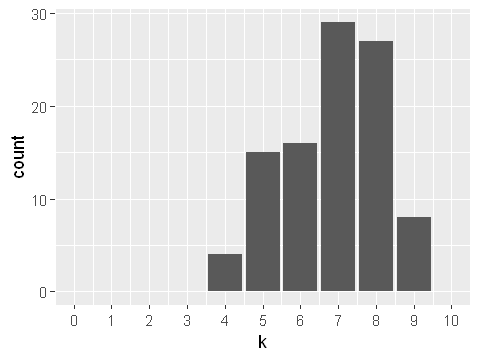

In [6]:
outcomes <- rbinom(n=100, size=10, prob=0.7)
ggplot(data.frame(k=outcomes), aes(x=k)) +
geom_bar() +
scale_x_continuous(limits=c(0, 10), breaks=0:10)

#  binomial density function

Warning message:
"Removed 2 rows containing missing values (geom_bar)."

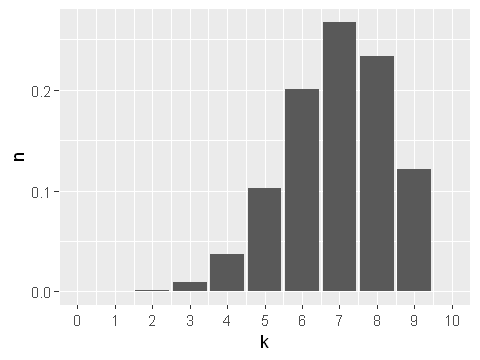

In [7]:
k <- 0:10
n <- dbinom(x = k, size =10, prob = 0.7)

ggplot(data.frame(k=k, n=n), aes(x=k, y=n)) +
geom_bar(stat="identity") +
scale_x_continuous(limits=c(0, 10), breaks=0:10)

\begin{exercise}
Make a horizontal histogram of the number of successes expected from 5 trials when the probability of success in each trial is 0.25.
\end{exercise}

\begin{exercise}
You have a miracle drug that will cure 70% of people infected with HIV. You run many clinical trials with 100 HIV-infected people in each trial using this drug. What fraction of the trials have 80 or more people cured?

Find the answer using properties of the binomial distribution
Find the answer using a simulation with 10000 trials
\end{exercise}

# Quiz questions you must be able to answer

At this point we really have all that we need for computing binomial probabilities. However, there are many different ways to ask the question. Consider the following. If the probability of success in a binomial distribution is 0.42 and we do 34 trials, what is the probability of getting

* less than or equal to 11 successes?
* less than 11 successes?
* exactly 11 successes?
* more than 11 successes?
* equal to or more than 11 successes?
* no fewer than 11 successes?
* no more than 11 successes?
* something other than 11 successes?
* between 11 and 18 successes, including 11 and 18?
* between 11 and 18 successes, excluding 11 and 18?
* less than 11 or more than 18 successes?
* less than or equal to 11 or more than or equal to 18 successes? 

Let us go through each of those.

* less than or equal to 11 successes: This is the meaning of the standard call to the pbinom() function. Thus the command pbinom(11,34,0.42) will give us the answer 0.1672396.

* less than 11 successes: This is equivalent to finding the probability of getting 10 or fewer successes. Thus the command is pbinom(10,34,0.42). The answer is 0.09292053.

* exactly 11 successes: We can do this as the probability of getting 11 or less minus the probability of getting 10 or less. To do that we could use pbinom(11,34,0.42)-pbinom(10,34,0.42) to get the answer 0.07431911. Alternatively, if we have loaded our function pbinomeq() then we can use it as pbinomeq(11,34,0.42) to get the same 0.07431911.

* more than 11 successes: This is the complement of having 11 or fewer successes. Thus, we are really looking at 1-P(X≤11) which becomes 1-pbinom(11,34,0.42) which gives us 0.8327604. Alternatively, we could look at this as the probability of getting 12 or more successes. One might think that the command `pbinom(12,34,0.42,lower.tail=FALSE)` would compute this. However, the documentation for R states that for the pbinom() function **lower.tail logical; if TRUE (default), probabilities are P[X≤x], otherwise, P[X>x]**. Therefore, if we specify `lower.tail=FALSE` we will not be including the first value since we are then looking at a "greater than" situation. If we choose to use the lower.tail=FALSE option we need to start at a value below 12. Therefore the command we want is pbinom(11,34,0.42,lower.tail=FALSE) which yields the same result, 0.8327604.

* equal to or more than 11 successes: Now we can compute not getting 0 through 10 successes via 1-pbinom(10,34,0.42) to get 0.9070795, or we could use the lower.tail=FALSE approach , remembering to adjust the first argument to the function and use the command pbinom(10,34,0.42,lower.tail=FALSE) to get 0.9070795.

* no fewer than 11 successes? "No fewer than 11" means "11 or more". We did this before as 1-pbinom(10,34,0.42) or pbinom(10,34,0.42,lower.tail=FALSE) to get 0.9070795.

* no more than 11 successes: "No more than 11" means "11 or fewer" which we did as pbinom(11,34,0.42) which gave us 0.1672396.

* something other than 11 successes: This is the compliment of having exactly 11 successes. We could play with the pbinom() function but it s easier to just use the pbinomeq() function as 1-pbinomeq(11,34,0.42) to get the answer 0.9256809.

* between 11 and 18 successes, including 11 and 18? Here we find the probability of getting 18 or fewer and then subtract the probability of getting less than 11. We can do this via the command pbinom(18,34,0.42)-pbinom(10,34,0.42) to get the result 0.8349292.

* between 11 and 18 successes, excluding 11 and 18: This is similar to the previous case except that we no longer want to include 18 and 11. We just need to adjust the command as pbinom(17,34,0.42)-pbinom(11,34,0.42) to get the result 0.7008324.

* less than 11 or more than 18 successes: This is just the complement of the probability of having between 11 and 18 successes (including the 11 and the 18) so we can code this as 1-(pbinom(18,34,0.42)-pbinom(10,34,0.42)) which gives the answer 0.1650708.

* less than or equal to 11 or more than or equal to 18 successes: This is just a slight change from the previous problem in that we now include 11 and 18 in the answer, not in the part being excluded. The command has to become 1-(pbinom(17,34,0.42)-pbinom(11,34,0.42)) which gives the answer 0.2991676. 



# Mean and variance of the binomial distribution

Now we want to look at the __mean, variance, and standard deviation__ of the binomial random variable. In doing this we need to point out that these are parameters of the distribution, not statistics drawn from a sample distribution. That is, if we have a binomial random variable X for the case where n=5 and p=0.40, then there is a mean for this, called $\mu_X$, a variance, called $\sigma_X^2$, and a standard deviation, called $sigma_X$, for that distribution. If we have a sample from that distribution then we expect that the sample statistics will be close to, though not the same as, the distribution parameters.


**The mean of the binomial distribution is $np$ and the variance is $np(1-p)$.** Note that the mean and variance are defined by the same two parameters $n$ and $p$ - once the mean is known, the variance is fixed. Hence it is common for real world data to resemble a binomial distribution except that the variance is larger than expected - this is known as over-dispersion.

In [5]:
# mean of a binomial sample
n <- 10
p <- 0.7
x <- rbinom(10000, n, p)
mean(x)

[1] 7.0087

In [6]:
# theoretical mean of the binomial distribution
n*p

[1] 7

n * p

In [7]:
# variance of a binomial sample
round(var(x), 2)


[1] 2.09

In [8]:
# theoretical variance if the binomial distribution 
n * p * (1-p)

[1] 2.1

# Quiz computations you must be able to carry out

In [10]:
# Some examples of binominal probabilities
#
#  First, introduce pbinom().

#  What is the probability of getting 8 or fewer 
#  successes in 23 trials, if the probability of success
#  is 0.42?
pbinom( 8, 23, 0.42 )
#
#  What is the probability of getting 7 or fewer 
#  successes in 23 trials, if the probability of success
#  is 0.42?
pbinom( 7, 23, 0.42 )
#
#  Then, let us take care of getting an exact 
#  probability.
#
#  What is the probability of getting exactly 8
#  successes in 23 trials if the probability of
#  success is 0.42?
#
pbinom( 8, 23, 0.42) - pbinom( 7, 23, 0.42)
#
#  Alternatively, we do have a special function, 
#  pbinomeq() that will find that same value
#  but we need to load it into our environment.
#

pbinomeq( 8, 23, 0.42)

#
# Then we start to look at stranger questions.
#
#  what is the probability of getting anything
#  other than 8 successes out of 23 trials when
#  the probability of success is 0.42?
#
1 - pbinomeq( 8, 23, 0.42)
#
#  What is the probability of getting more than
#  8 successes out of 23 trials witen the 
#  probability of success is 0.42?
#
1 - pbinom( 8, 23, 0.42 )
#
#  We should note that R has a special parameter
#  that is often used to change the direction of
#  our view of the probabilty distribution.  That
#  parameter is lower.tail, and we can demonstrate
#  it here.
#
#  The probability of getting 8 or fewer successes
#  for our case was
pbinom( 8, 23, 0.42 )
#  The probability of getting more than 8 is
1 - pbinom( 8, 23, 0.42 )
#  but we could have done that by
pbinom( 8, 23, 0.42, lower.tail=FALSE)
# 
#   Note that pbinom( 8, 23, 0.42 ) gave us
#      8 or less
#  but that pbinom( 8, 23, 0.42, lower.tail=FALSE)
#      gives us more than 8,
#   specifically, not "8 or more'!
#
#  What is the probability of getting fewer
#  than 8 successes in 23 trials with the 
# probability of success = 0.42?
#
#  "fewer than 8" is the same as 
#  # 7 of less" so
pbinom( 7, 23, 0.42)
#
#  We could have done this same problem by saying 
#  "fewer than 8" is the same as the complement
#  of "more than 7"
1 - pbinom( 7, 23, 0.42, lower.tail=FALSE)
#
#  What is the probability of getting between
#  10 and 14 successes out of 23 trials,
#  including 10 and 14, with
#  the probability of a success = 0.42?
#
# pbinom( 14, 23, 0.42) is the probabilty 
# of getting 14 or fewer. And, pbinom(9, 23, 0.42)
# of getting 9 or fewer, so
pbinom( 14, 23, 0.42) - pbinom( 9, 23, 0.42)
# is our answer.
#
#  What is the probability of getting fewer than
#  6 or more than 14 successes out of 23 trials 
#  when the probability of success is 0.42?
pbinom( 5, 23, 0.42) + 
       pbinom( 14, 23, 0.42, lower.tail=FALSE)


[1] 0.3156978

[1] 0.1814557

[1] 0.134242

[1] 0.134242

[1] 0.865758

[1] 0.6843022

[1] 0.3156978

[1] 0.6843022

[1] 0.6843022

[1] 0.1814557

[1] 0.1814557

[1] 0.5012354

[1] 0.05710881

# The Poisson distribution


**When the number of trials $n$ is very large, and the probability of success $p$ is very small, the binomial distribution can be approximated by the simpler Poisson distribution which only has a single parameter $\lambda = np$.**

The Poisson distribution with the single parameter $\lambda$ can be derived as the limiting case of a binomial distribution with parameters $n$ and $p = \lambda/n$ as $n$ goes to infinity. It is usually used to describe the distribution of the number of occurences of rare events  within a certain fixed period of time (e.g., number of photons emitted, rhodopsin photoisomerizations, or neural spikes dicharged within a small time window). **This distribution has the interesting property that its mean $\lambda$ is equal to its variance.**

$$P(x) = \frac{\lambda^x e^{-\lambda}}{x!}$$



In [11]:
x <- 0:8
n <- 1000
p <- 0.001
binomial <- dbinom(x, size=n, prob=p)
poisson <-  dpois(x, lambda=n*p)
round(data.frame(x=x, binomial=binomial, poisson=poisson), 4)

x,binomial,poisson
<dbl>,<dbl>,<dbl>
0,0.3677,0.3679
1,0.3681,0.3679
2,0.1840,0.1839
3,0.0613,0.0613
4,0.0153,0.0153
5,0.0030,0.0031
6,0.0005,0.0005
7,0.0001,0.0001
8,0.0000,0.0000


**Question**: How can I generate events using the Poisson distribution in R? The events could be the occurrence of floods in the next 1000 years at a given rate of occurrence per year.

[1] 1 1 1 1 1 1 1 1


 0  1  2  3  4  5  6  7  8  9 
 2  3 12  6  7  8  7  4  0  1 

[1] 1.233094e-06 1.261664e-08 7.085799e-11 2.252643e-13 4.440892e-16
 [6] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
[11] 0.000000e+00

[1] 1.233094e-06 1.261664e-08 7.085800e-11 2.253110e-13 4.174239e-16
 [6] 4.626179e-19 3.142097e-22 1.337219e-25 3.639328e-29 6.453883e-33
[11] 7.587807e-37

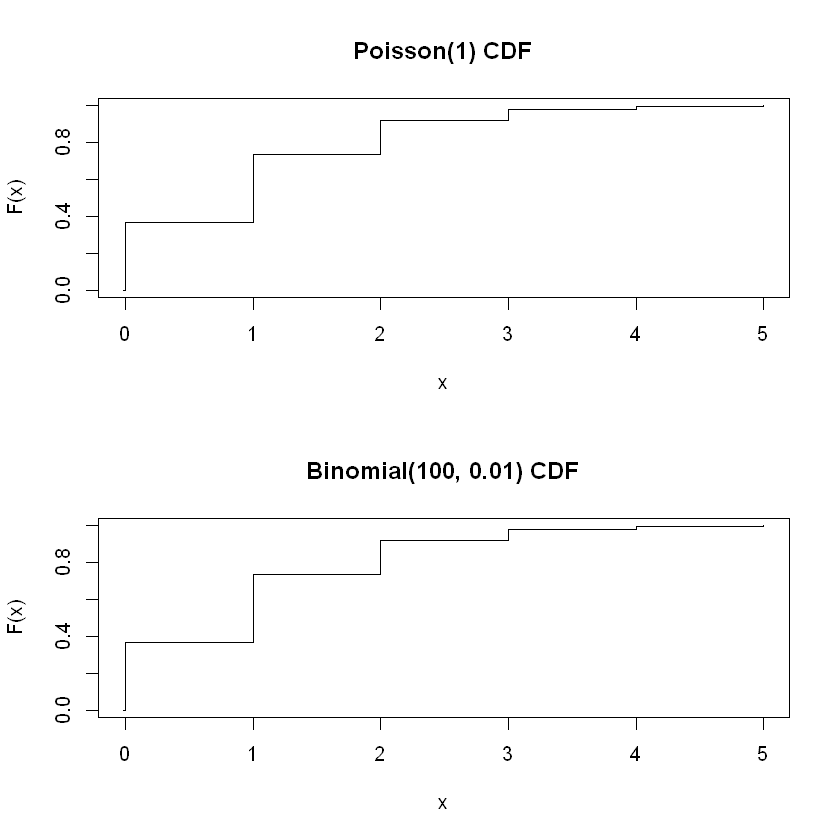

In [30]:
require(graphics)

-log(dpois(0:7, lambda = 1) * gamma(1+ 0:7)) # == 1
Ni <- rpois(50, lambda = 4); table(factor(Ni, 0:max(Ni)))

1 - ppois(10*(15:25), lambda = 100)  # becomes 0 (cancellation)
    ppois(10*(15:25), lambda = 100, lower.tail = FALSE)  # no cancellation

par(mfrow = c(2, 1))
x <- seq(-0.01, 5, 0.01)
plot(x, ppois(x, 1), type = "s", ylab = "F(x)", main = "Poisson(1) CDF")
plot(x, pbinom(x, 100, 0.01), type = "s", ylab = "F(x)",
     main = "Binomial(100, 0.01) CDF")

## The (limit) case  lambda = 0 :
stopifnot(identical(dpois(0,0), 1),
	  identical(ppois(0,0), 1),
	  identical(qpois(1,0), 0))


\begin{exercise}
Suppose that RNA-seq results in calling errors (e.g. an A is read as a C) once every 1,000 base pairs, and generated single-end reads of exactly 200 base pairs. What fraction of reads would have more than 2 errors?
\end{exercise}

# Mean and variance of the Poisson distribution

The mean of the Poisson distribution is $\lambda$, and its variance is also $\lambda$. Hence, just as for the binomial distribution, it is common to find real-world data that resembles the Poisson distribution, except that the variance is larger than expected. This is another example of over-dispersion.

In [12]:
x <- rpois(10000, 3.14)

round(mean(x), 2)

round(var(x), 2)

[1] 3.16

[1] 3.08

# The negative binomial distribution
**There are two ways $k$ successes from a series of $n$ Bernoulli trials can arise. In the first way, there were $n$ trials planned, and it just so happened that $k$ of these were successes. This is modeled by the binomial distribution. However, an alternative scenario is that trials are run until exactly $k$ successes are observed. This is modeled by the negative binomial distribution.**

Note that the `nbinom` family of functions in R models the number of *failures* before a target number of successes is reached, and not the number of trials.

[1] 4 5 6 6 4 5 5 4 4 4 7 1 2 6 8 3 7 7 5 4 4 5 3 3 5 5 1 7 6 2 4 5 4 6 6 7 8
 [38] 2 3 6 8 6 3 8 6 6 4 3 6 4 5 3 3 6 5 5 1 5 8 2 2 4 5 4 4 4 6 4 6 2 4 5 5 5
 [75] 6 4 6 5 5 4 4 3 4 7 3 3 7 5 4 5 5 6 5 5 4 8 6 4 5 4

[1] 14 20 12  9 11 17 16 10  4  6 13  9  7  4  6 10  8 17 12 14  8 14 10  7  8
 [26]  7 12  7 16  5  5 24 10 12  6  9  7 19  9 10 10  8  4 10 11  5 10  8  8  7
 [51]  8  8 15 16  8 15  6  9  5 25  9  4  7  6 12 11  4 14 13  4 12 17  7 16 10
 [76]  7  5 12 18 10 26 16 10 10  6 12  5 11 11  8  8  5 11  6  2 10 11 11  5  9

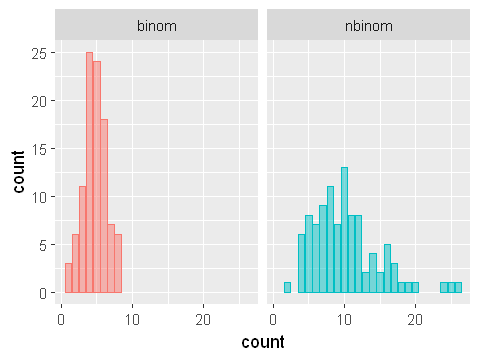

In [14]:
binom <- rbinom(n=100, size=10, prob=0.5)
nbinom <- rnbinom(n=100, size=10, prob=0.5)
df <- data.frame(binom=binom, nbinom=nbinom)
df <- df %>% gather(dist, count)
ggplot(df, aes(x=count, color=dist, fill=dist)) +
facet_wrap(~ dist) +
geom_bar(alpha=0.5) +
guides(color=F, fill=F)
binom
nbinom